In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('netflix_titles.csv')

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.drop('show_id',axis=1,inplace=True)

In [6]:
data.director.value_counts()

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
                          ..
Karan Anshuman             1
Theodore Witcher           1
Jos Humphrey               1
Jaivi Dhanda               1
Peter Winther              1
Name: director, Length: 4528, dtype: int64

In [7]:
data.director.unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [14]:
data.director.replace(to_replace=np.NaN,value='others',inplace=True)
data.cast.replace(to_replace=np.NaN,value='others',inplace=True)
data.country.replace(to_replace=np.NaN,value='others',inplace=True)
data.dropna(axis=0,inplace=True)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [15]:
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,others,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,others,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",others,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,others,others,others,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,others,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,others,others,others,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Exploratory Data Analysis

In [18]:
import plotly.express as px

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='type', ylabel='count'>

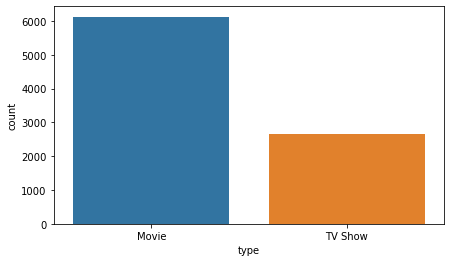

In [27]:
plt.figure(figsize=(7,4))
sns.countplot(x='type',data=data)

In [29]:
data['director'].value_counts()

others                    2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
                          ... 
Natasha Lyonne               1
Karan Anshuman               1
Juraj Šajmovič               1
Jaivi Dhanda                 1
Mohammad Adel                1
Name: director, Length: 4527, dtype: int64

In [47]:
data['country'].value_counts().nlargest(10)

United States     2809
India              972
others             829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

In [56]:
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [61]:
data.listed_in.value_counts().nlargest(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

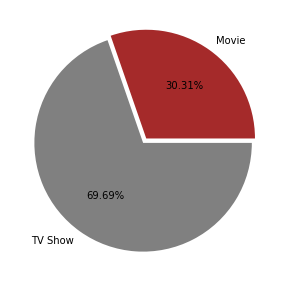

In [65]:
plt.figure(figsize=(10,5))
plt.pie(data['type'].value_counts().sort_values(),labels=data['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['brown','grey'])
plt.show()

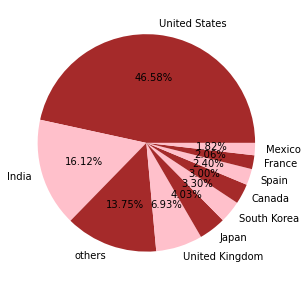

In [112]:
# top 10 countries with most tvshows and movies
plt.figure(figsize=(10,5))
plt.pie(data['country'].value_counts().nlargest(10),labels=data['country'].value_counts().nlargest(10).index,
        autopct='%1.2f%%',colors=['brown','pink'])
plt.show()

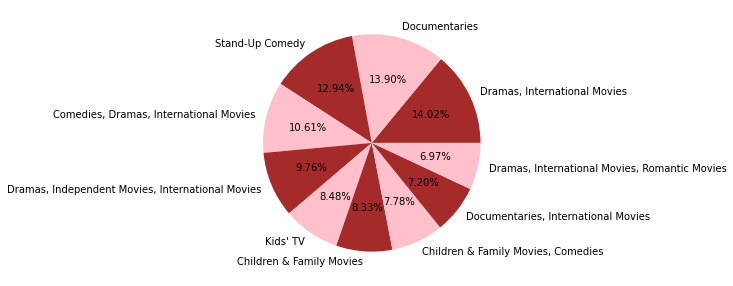

In [118]:
plt.figure(figsize=(10,5))
plt.pie(data['listed_in'].value_counts().nlargest(10),labels=data['listed_in'].value_counts().nlargest(10).index,
        autopct='%1.2f%%',colors=['brown','pink'])
plt.show()

<AxesSubplot:xlabel='release_year', ylabel='count'>

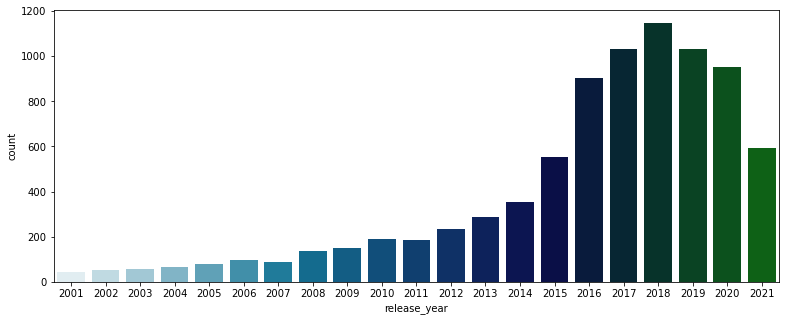

In [82]:
plt.figure(figsize=(13,5))
sns.countplot(x='release_year',data=data[data['release_year']>2000],palette='ocean_r')

<AxesSubplot:xlabel='release_year', ylabel='count'>

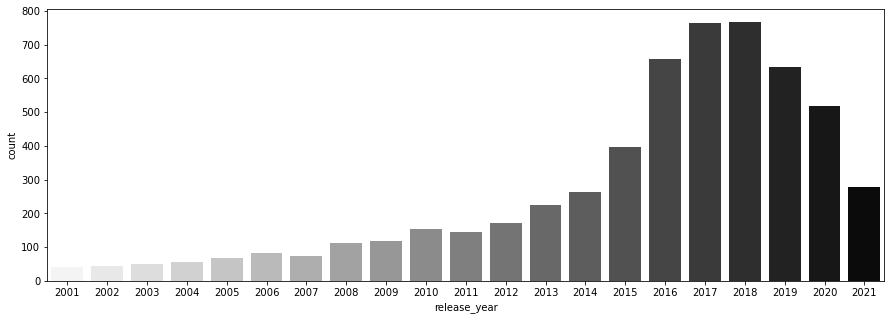

In [79]:
# Trend of movie content over the years
plt.figure(figsize=(15,5))
sns.countplot(x='release_year',data=data[(data['type']=='Movie')&(data['release_year']>2000)],palette='gray_r')

<AxesSubplot:xlabel='release_year', ylabel='count'>

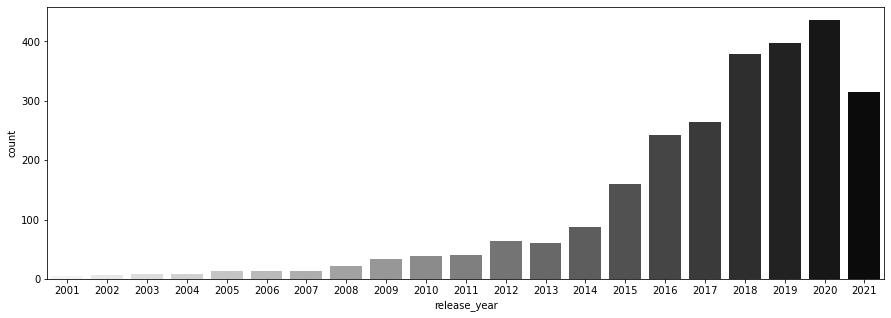

In [80]:
# Trend of TV show content over the years
plt.figure(figsize=(15,5))
sns.countplot(x='release_year',data=data[(data['type']=='TV Show')&(data['release_year']>2000)],palette='gray_r')

<AxesSubplot:xlabel='rating', ylabel='count'>

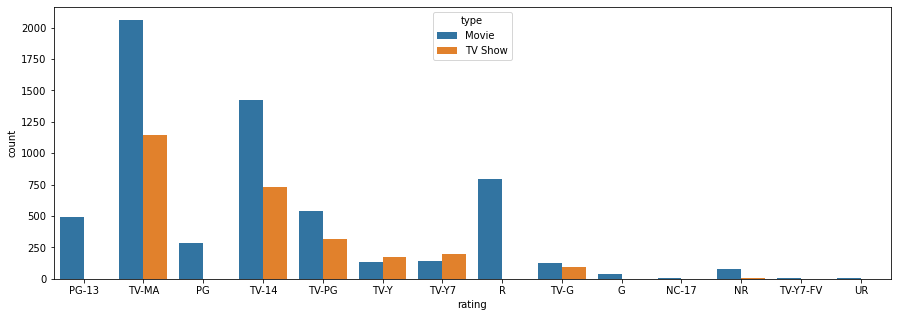

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(x='rating',data=data,hue=data['type'])

In [97]:
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [119]:
data.to_excel("cleaned_netflix_data.xlsx",sheet_name="output")